In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (20, 10)    # Set default figure size (width, height)
matplotlib.rcParams['font.size'] = 12               # Set default font size
matplotlib.rcParams['axes.titlesize'] = 20          # Set default title font size
matplotlib.rcParams['axes.labelsize'] = 20          # Set default label font size
plt.style.use('Solarize_Light2')                    # Set default style

# Read 2023 cvs files competitions
boulder_df = pd.read_csv("./competitions/world_cups_2023/2023_boulder.csv")
lead_df = pd.read_csv("./competitions/world_cups_2023/2023_lead.csv")
speed_df = pd.read_csv("./competitions/world_cups_2023/2023_speed.csv")

# Read the athletes file
athletes = pd.read_csv("./athlete_info_v2.csv")

### Data Cleaning

In [3]:
athletes.head(10)

,Name,AthleteUrl,Gender,Height,Active,Participations,Age,Country
0,Liam HEALY,https://ifsc.results.info/#/athlete/2535,Men,-,2017,8,26,AUS
1,Dylan PARKS,https://ifsc.results.info/#/athlete/13853,Men,-,2022,13,18,AUS
2,Stefan SCHERZ,https://ifsc.results.info/#/athlete/1274,Men,179,2015,66,22,AUT
3,Jan-luca POSCH,https://ifsc.results.info/#/athlete/1245,Men,184,2012,83,26,AUT
4,Nicolai UZNIK,https://ifsc.results.info/#/athlete/1256,Men,173,2014,88,23,AUT
5,Jakob SCHUBERT,https://ifsc.results.info/#/athlete/1214,Men,176,2004,233,33,AUT
6,Nicolas COLLIN,https://ifsc.results.info/#/athlete/320,Men,179,2012,137,25,BEL
7,Simon LORENZI,https://ifsc.results.info/#/athlete/318,Men,168,2011,104,26,BEL
8,Hannes VAN DUYSEN,https://ifsc.results.info/#/athlete/373,Men,175,2018,53,19,BEL
9,Rodrigo IASI HANADA,https://ifsc.results.info/#/athlete/12903,Men,-,2021,20,21,BRA


In [4]:
athletes.shape

(751, 8)

In [5]:
athletes.dtypes

Name              object
AthleteUrl        object
Gender            object
Height            object
Active            object
Participations     int64
Age                int64
Country           object
dtype: object

In [6]:
# Check the columns with '-' in it
(athletes == '-').any()

Name              False
AthleteUrl        False
Gender            False
Height             True
Active             True
Participations    False
Age               False
Country           False
dtype: bool

In [7]:
athletes[athletes['Active'] == '-']

,Name,AthleteUrl,Gender,Height,Active,Participations,Age,Country
746,Mengli ZHANG,https://ifsc.results.info/#/athlete/15133,Women,-,-,0,20,CHN


In [8]:
# Remove the above value
idx = athletes[athletes['Active'] == '-'].index
athletes = athletes.drop(idx)

In [9]:
# Change data types from Object to Numeric type
athletes['Height'] = pd.to_numeric(athletes['Height'], errors='coerce')
athletes['Active'] = athletes['Active'].astype('Int64')

In [10]:
# Check the columns with '-' in it
(athletes == '-').any()

Name              False
AthleteUrl        False
Gender            False
Height            False
Active            False
Participations    False
Age               False
Country           False
dtype: boolean

In [11]:
athletes.dtypes

Name               object
AthleteUrl         object
Gender             object
Height            float64
Active              Int64
Participations      int64
Age                 int64
Country            object
dtype: object

In [12]:
athletes.isna().sum()

Name                0
AthleteUrl          0
Gender              0
Height            424
Active              0
Participations      0
Age                 0
Country             0
dtype: int64

There are 424 records with no height. In this case, I will use the mean value per gender and country to fill in the missing values.

In [13]:
# Create a copy of the data frame to fill in with the mean values
athletes_v2 = athletes
athletes_v2['Height'] = athletes['Height'].fillna(athletes.groupby(['Country', 'Gender'])['Height'].transform('mean'))
athletes_v2.isna().sum()

Name               0
AthleteUrl         0
Gender             0
Height            94
Active             0
Participations     0
Age                0
Country            0
dtype: int64

There are still 94 missing values after adding the mean values per gender and country. This mean that there are still athletes with no height information. In this case, I will use the mean value per Gender.

In [14]:
athletes_v2['Height'] = athletes['Height'].fillna(athletes.groupby(['Gender'])['Height'].transform('mean'))
athletes_v2.isna().sum()

Name              0
AthleteUrl        0
Gender            0
Height            0
Active            0
Participations    0
Age               0
Country           0
dtype: int64

In [15]:
boulder_df.head(10)

,Rank,Name,Unnamed: 2,Country,Qualification,Semi-final,Final,event_name,Date,Gender
0,1.0,MEJDI,SCHALCK,FRA,4t4z 6 6,1t4z 2 9,2t3z 7 7,IFSC_World_Cup_Hachioji_2023,21 April - 23 April 2023,Men
1,2.0,HANNES,VAN DUYSEN,BEL,3t5z 9 15,1t4z 8 14,1t3z 2 11,IFSC_World_Cup_Hachioji_2023,21 April - 23 April 2023,Men
2,3.0,PAUL,JENFT,FRA,4t5z 10 9,2t4z 11 13,1t3z 3 3,IFSC_World_Cup_Hachioji_2023,21 April - 23 April 2023,Men
3,4.0,KOKORO,FUJII,JPN,4t5z 8 17,1t2z 3 4,0t3z 0 9,IFSC_World_Cup_Hachioji_2023,21 April - 23 April 2023,Men
4,5.0,SORATO,ANRAKU,JPN,3t5z 4 17,1t4z 1 12,0t3z 0 11,IFSC_World_Cup_Hachioji_2023,21 April - 23 April 2023,Men
5,6.0,JONGWON,CHON,KOR,3t4z 3 10,2t2z 6 5,0t3z 0 13,IFSC_World_Cup_Hachioji_2023,21 April - 23 April 2023,Men
6,7.0,DOHYUN,LEE,KOR,5t5z 10 10,1t2z 5 5,NaN,IFSC_World_Cup_Hachioji_2023,21 April - 23 April 2023,Men
7,8.0,MEICHI,NARASAKI,JPN,3t4z 5 10,0t4z 0 10,NaN,IFSC_World_Cup_Hachioji_2023,21 April - 23 April 2023,Men
8,9.0,EDVARDS,GRUZITIS,LAT,4t5z 18 12,0t4z 0 11,NaN,IFSC_World_Cup_Hachioji_2023,21 April - 23 April 2023,Men
9,10.0,TOMOA,NARASAKI,JPN,5t5z 20 13,0t4z 0 12,NaN,IFSC_World_Cup_Hachioji_2023,21 April - 23 April 2023,Men


In [16]:
lead_df.head(10)

,Rank,Name,Unnamed: 2,Country,Qualification,Semi-final,Final,event_name,Date,Gender
0,1.0,SASCHA,LEHMANN,SUI,4.03,43+,44+,IFSC_World_Cup_Innsbruck_2023,14 June - 18 June 2023,Men
1,2.0,ALEXANDER,MEGOS,GER,4.03,39+,44+,IFSC_World_Cup_Innsbruck_2023,14 June - 18 June 2023,Men
2,3.0,JAKOB,SCHUBERT,AUT,5.48,43,42+,IFSC_World_Cup_Innsbruck_2023,14 June - 18 June 2023,Men
3,4.0,SORATO,ANRAKU,JPN,2.5,40,42+,IFSC_World_Cup_Innsbruck_2023,14 June - 18 June 2023,Men
4,5.0,MEJDI,SCHALCK,FRA,15.2,40,42+,IFSC_World_Cup_Innsbruck_2023,14 June - 18 June 2023,Men
5,6.0,SATONE,YOSHIDA,JPN,4.03,39+,42+,IFSC_World_Cup_Innsbruck_2023,14 June - 18 June 2023,Men
6,7.0,MASAHIRO,HIGUCHI,JPN,14.07,42+,42,IFSC_World_Cup_Innsbruck_2023,14 June - 18 June 2023,Men
7,8.0,ALBERTO,GINÉS LÓPEZ,ESP,22.05,40,42,IFSC_World_Cup_Innsbruck_2023,14 June - 18 June 2023,Men
8,9.0,TAISEI,HOMMA,JPN,7.65,42,40+,IFSC_World_Cup_Innsbruck_2023,14 June - 18 June 2023,Men
9,10.0,AO,YURIKUSA,JPN,9.87,39+,NaN,IFSC_World_Cup_Innsbruck_2023,14 June - 18 June 2023,Men


In [17]:
speed_df.head(10)

,Rank,Name,Unnamed: 2,Country,Qualification,Final,event_name,Date,Gender
0,1.0,VEDDRIQ,LEONARDO,INA,4.98 (wr) (asr),5.01,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
1,2.0,JINBAO,LONG,CHN,5.40,5.12,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
2,3.0,XINSHANG,WANG,CHN,5.17,5.11,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
3,4.0,JIANGUO,LONG,CHN,5.130,6.37,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
4,5.0,EUNCHEOL,SHIN,KOR,5.131,8.69 (5.131),IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
5,6.0,PENG,WU,CHN,5.231,6.13 (5.198),IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
6,7.0,ASPAR,ASPAR,INA,5.22,5.24 (5.220),IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
7,8.0,MATTEO,ZURLONI,ITA,5.230 (er),8.04 (5.230),IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
8,9.0,SAMUEL,WATSON,USA,5.02 (par),5.42 (5.29),IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
9,10.0,RAHMAD,ADI MULYONO,INA,5.239,5.29 (5.239),IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men


In [18]:
# Change columns names
boulder_df = boulder_df.rename(columns={"Name": "FName", "Unnamed: 2":"LName"})
lead_df = lead_df.rename(columns={"Name": "FName", "Unnamed: 2":"LName"})
speed_df = speed_df.rename(columns={"Name": "FName", "Unnamed: 2":"LName"})

In [19]:
# Change the event name to display only the city and year
boulder_df['event_name'].value_counts()

event_name
IFSC_World_Championships_Bern_2023    242
IFSC_World_Cup_Innsbruck_2023         203
IFSC_World_Cup_Brixen_2023            170
IFSC_World_Cup_Prague_2023            168
IFSC_World_Cup_Hachioji_2023          167
28 April - 30 April 2023              165
IFSC_World_Cup_Salt_Lake_City_2023    126
Name: count, dtype: int64

There is a string in the events_name columns `28 April - 30 April 2023` which does not make sense. Let's further explore this rows

In [20]:
boulder_df[boulder_df['event_name'] == '28 April - 30 April 2023']

,Rank,FName,LName,Country,Qualification,Semi-final,Final,event_name,Date,Gender
167,1.0,MEJDI,SCHALCK,FRA,4t5z 9 8,2t3z 2 7,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men,NaN
168,2.0,TOMOA,NARASAKI,JPN,4t5z 8 12,2t3z 6 10,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men,NaN
169,3.0,JONGWON,CHON,KOR,4t4z 7 6,2t2z 2 2,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men,NaN
170,4.0,DOHYUN,LEE,KOR,4t5z 7 11,1t2z 1 9,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men,NaN
171,5.0,MANUEL,CORNU,FRA,4t5z 9 13,1t2z 4 5,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men,NaN
...,...,...,...,...,...,...,...,...,...,...
327,69.0,DASOM,YUN,KOR,0t0z 0 0,NaN,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Women,NaN
328,75.0,PRATEEKSHA,ARUN,IND,0t0z 0 0,NaN,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Women,NaN
329,75.0,WAI-MUI,LING,HKG,0t0z 0 0,NaN,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Women,NaN
330,75.0,ELIZABETH,SEPULVEDA,PUR,0t0z 0 0,NaN,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Women,NaN


After googling a bit, the boulder final round of the Seoul 2023 world cup was cancelled due to weather; therefore, there is not final results and the semifinals results were used to determined the winners.
- [ifsc websit](https://www.ifsc-climbing.org/index.php/component/ifsc/?view=event&WetId=1292)
- [olympics website](https://olympics.com/en/news/mejdi-schalck-nonaka-miho-win-boulder-seoul-results)

To fix this, I will shift those values to the right, and then copy the semi-final results to the final column.

In [21]:
# Shifts the values from row 167 to 331 to the right, then copy the values from the semi-final columns to the final column.
starting_row = 167
ending_row = 331

# Shift columns
boulder_df.iloc[starting_row:ending_row+1, 7:] = boulder_df.iloc[starting_row:ending_row+1, 6:-1].values
boulder_df.loc[starting_row:ending_row, 'Final'] = boulder_df.loc[starting_row:ending_row,'Semi-final']

In [22]:
boulder_df.isna().sum()

Rank                9
FName               0
LName               0
Country             0
Qualification       0
Semi-final        959
Final            1130
event_name          0
Date                0
Gender              0
dtype: int64

In [23]:
boulder_df.iloc[starting_row:ending_row]

,Rank,FName,LName,Country,Qualification,Semi-final,Final,event_name,Date,Gender
167,1.0,MEJDI,SCHALCK,FRA,4t5z 9 8,2t3z 2 7,2t3z 2 7,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
168,2.0,TOMOA,NARASAKI,JPN,4t5z 8 12,2t3z 6 10,2t3z 6 10,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
169,3.0,JONGWON,CHON,KOR,4t4z 7 6,2t2z 2 2,2t2z 2 2,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
170,4.0,DOHYUN,LEE,KOR,4t5z 7 11,1t2z 1 9,1t2z 1 9,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
171,5.0,MANUEL,CORNU,FRA,4t5z 9 13,1t2z 4 5,1t2z 4 5,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Men
...,...,...,...,...,...,...,...,...,...,...
326,69.0,TSENG-SHUN,WONG,HKG,0t1z 0 3,NaN,NaN,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Women
327,69.0,DASOM,YUN,KOR,0t0z 0 0,NaN,NaN,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Women
328,75.0,PRATEEKSHA,ARUN,IND,0t0z 0 0,NaN,NaN,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Women
329,75.0,WAI-MUI,LING,HKG,0t0z 0 0,NaN,NaN,IFSC_World_Cup_Seoul_2023,28 April - 30 April 2023,Women


In [24]:
boulder_df['event_name'].value_counts()

event_name
IFSC_World_Championships_Bern_2023    242
IFSC_World_Cup_Innsbruck_2023         203
IFSC_World_Cup_Brixen_2023            170
IFSC_World_Cup_Prague_2023            168
IFSC_World_Cup_Hachioji_2023          167
IFSC_World_Cup_Seoul_2023             165
IFSC_World_Cup_Salt_Lake_City_2023    126
Name: count, dtype: int64

In [25]:
lead_df['event_name'].value_counts()

event_name
IFSC_World_Championships_Bern_2023    230
IFSC_World_Cup_Innsbruck_2023         200
IFSC_World_Cup_Villars_2023           181
IFSC_World_Cup_Chamonix_2023          176
IFSC_World_Cup_Briançon_2023          143
IFSC_World_Cup_Koper_2023             122
IFSC_World_Cup_Wujiang_2023            93
Name: count, dtype: int64

In [26]:
speed_df['event_name'].value_counts()

event_name
IFSC_World_Championships_Bern_2023    136
IFSC_World_Cup_Villars_2023           133
IFSC_World_Cup_Chamonix_2023          129
IFSC_World_Cup_Seoul_2023             122
IFSC_World_Cup_Jakarta_2023           119
IFSC_World_Cup_Salt_Lake_City_2023    113
IFSC_World_Cup_Wujiang_2023            85
Name: count, dtype: int64

In [27]:
# Normalize event names to city_year
def normalize_event_name(event_name):
   return event_name.split("_", 3)[2:][1]

In [28]:
boulder_df['event_name'] = boulder_df['event_name'].apply(normalize_event_name)
lead_df['event_name'] = lead_df['event_name'].apply(normalize_event_name)
speed_df['event_name'] = speed_df['event_name'].apply(normalize_event_name)

In [29]:
boulder_df['event_name'].value_counts()

event_name
Bern_2023              242
Innsbruck_2023         203
Brixen_2023            170
Prague_2023            168
Hachioji_2023          167
Seoul_2023             165
Salt_Lake_City_2023    126
Name: count, dtype: int64

In [30]:
lead_df['event_name'].value_counts()

event_name
Bern_2023         230
Innsbruck_2023    200
Villars_2023      181
Chamonix_2023     176
Briançon_2023     143
Koper_2023        122
Wujiang_2023       93
Name: count, dtype: int64

In [31]:
speed_df['event_name'].value_counts()

event_name
Bern_2023              136
Villars_2023           133
Chamonix_2023          129
Seoul_2023             122
Jakarta_2023           119
Salt_Lake_City_2023    113
Wujiang_2023            85
Name: count, dtype: int64

In [32]:
# Count number of 'dns' occurrences
boulder_df.eq('dns').sum()

Rank             0
FName            0
LName            0
Country          0
Qualification    9
Semi-final       0
Final            0
event_name       0
Date             0
Gender           0
dtype: int64

In [33]:
lead_df.eq('dns').sum()

Rank              0
FName             0
LName             0
Country           0
Qualification    12
Semi-final        0
Final             0
event_name        0
Date              0
Gender            0
dtype: int64

In [34]:
speed_df.eq('dns').sum()

Rank             0
FName            0
LName            0
Country          0
Qualification    4
Final            0
event_name       0
Date             0
Gender           0
dtype: int64

In [35]:
# Remove athletes with 'dns' status in qualification column for all diciplines
boulder_df = boulder_df[boulder_df['Qualification'] != 'dns']
lead_df = lead_df[lead_df['Qualification'] != 'dns']
speed_df = speed_df[speed_df['Qualification'] != 'dns']

# Make new column with full name
boulder_df['Name'] = boulder_df['FName'] + " " + boulder_df['LName']
lead_df['Name'] = lead_df['FName'] + " " + lead_df['LName']
speed_df['Name'] = speed_df['FName'] + " " + speed_df['LName']

# Make new column for date type
boulder_df['Date1'] = boulder_df['Date'].str.split("-", n=1, expand=True)[1]
boulder_df['Date1'] = boulder_df['Date1'].str.strip()
boulder_df['Date1'] = pd.to_datetime(boulder_df['Date1'], format="%d %B %Y")

lead_df['Date1'] = lead_df['Date'].str.split("-", n=1, expand=True)[1]
lead_df['Date1'] = lead_df['Date1'].str.strip()
lead_df['Date1'] = pd.to_datetime(lead_df['Date1'], format="%d %B %Y")

speed_df['Date1'] = speed_df['Date'].str.split("-", n=1, expand=True)[1]
speed_df['Date1'] = speed_df['Date1'].str.strip()
speed_df['Date1'] = pd.to_datetime(speed_df['Date1'], format="%d %B %Y")

# Remove Date Column
boulder_df = boulder_df.drop(columns=['Date', 'FName', 'LName'])
lead_df = lead_df.drop(columns=['Date', 'FName', 'LName'])
speed_df = speed_df.drop(columns=['Date', 'FName', 'LName'])

In [36]:
lead_df.head(10)

,Rank,Country,Qualification,Semi-final,Final,event_name,Gender,Name,Date1
0,1.0,SUI,4.03,43+,44+,Innsbruck_2023,Men,SASCHA LEHMANN,2023-06-18
1,2.0,GER,4.03,39+,44+,Innsbruck_2023,Men,ALEXANDER MEGOS,2023-06-18
2,3.0,AUT,5.48,43,42+,Innsbruck_2023,Men,JAKOB SCHUBERT,2023-06-18
3,4.0,JPN,2.5,40,42+,Innsbruck_2023,Men,SORATO ANRAKU,2023-06-18
4,5.0,FRA,15.2,40,42+,Innsbruck_2023,Men,MEJDI SCHALCK,2023-06-18
5,6.0,JPN,4.03,39+,42+,Innsbruck_2023,Men,SATONE YOSHIDA,2023-06-18
6,7.0,JPN,14.07,42+,42,Innsbruck_2023,Men,MASAHIRO HIGUCHI,2023-06-18
7,8.0,ESP,22.05,40,42,Innsbruck_2023,Men,ALBERTO GINÉS LÓPEZ,2023-06-18
8,9.0,JPN,7.65,42,40+,Innsbruck_2023,Men,TAISEI HOMMA,2023-06-18
9,10.0,JPN,9.87,39+,NaN,Innsbruck_2023,Men,AO YURIKUSA,2023-06-18


In [37]:
lead_df.dtypes

Rank                    float64
Country                  object
Qualification            object
Semi-final               object
Final                    object
event_name               object
Gender                   object
Name                     object
Date1            datetime64[ns]
dtype: object

In [38]:
speed_df.head(10)

,Rank,Country,Qualification,Final,event_name,Gender,Name,Date1
0,1.0,INA,4.98 (wr) (asr),5.01,Seoul_2023,Men,VEDDRIQ LEONARDO,2023-04-30
1,2.0,CHN,5.40,5.12,Seoul_2023,Men,JINBAO LONG,2023-04-30
2,3.0,CHN,5.17,5.11,Seoul_2023,Men,XINSHANG WANG,2023-04-30
3,4.0,CHN,5.130,6.37,Seoul_2023,Men,JIANGUO LONG,2023-04-30
4,5.0,KOR,5.131,8.69 (5.131),Seoul_2023,Men,EUNCHEOL SHIN,2023-04-30
5,6.0,CHN,5.231,6.13 (5.198),Seoul_2023,Men,PENG WU,2023-04-30
6,7.0,INA,5.22,5.24 (5.220),Seoul_2023,Men,ASPAR ASPAR,2023-04-30
7,8.0,ITA,5.230 (er),8.04 (5.230),Seoul_2023,Men,MATTEO ZURLONI,2023-04-30
8,9.0,USA,5.02 (par),5.42 (5.29),Seoul_2023,Men,SAMUEL WATSON,2023-04-30
9,10.0,INA,5.239,5.29 (5.239),Seoul_2023,Men,RAHMAD ADI MULYONO,2023-04-30


In [39]:
# Make new columns with only the numeric values
speed_df['qlf1'] = speed_df['Qualification'].str.extract(r'(\d+\.\d+)').astype('float64')
speed_df['final1'] = speed_df['Final'].str.extract(r'(\d+\.\d+)').astype('float64')

In [40]:
boulder_df.isna().sum()

Rank                0
Country             0
Qualification       0
Semi-final        950
Final            1121
event_name          0
Gender              0
Name                0
Date1               0
dtype: int64

In [41]:
lead_df.isna().sum()

Rank                0
Country             0
Qualification       0
Semi-final        768
Final            1017
event_name          0
Gender              0
Name                0
Date1               0
dtype: int64

In [42]:
speed_df.isna().sum()

Rank               0
Country            0
Qualification      0
Final            609
event_name         0
Gender             0
Name               0
Date1              0
qlf1              35
final1           613
dtype: int64

All three data frames have NaN values for he event results, this mean that the athlete did not qualified for the next stage of the competition. For the purpose of this analysis, I will leave the `NaN` values as it.

### EDA

Let's start exploring the athletes csv file. The athletes csv file contains information of all athletes that participated during the world cup 2023 competitions.

#### Athletes

In [43]:
athletes_v2.shape

(750, 8)

In [44]:
athletes_v2.columns

Index(['Name', 'AthleteUrl', 'Gender', 'Height', 'Active', 'Participations',
       'Age', 'Country'],
      dtype='object')

In [45]:
athletes_v2.describe()

,Height,Active,Participations,Age
count,750.000000,750.0,750.000000,750.000000
mean,169.736586,2016.822667,36.206667,22.512000
std,7.569331,4.628728,36.423282,4.510393
min,149.000000,1997.0,1.000000,16.000000
25%,163.197471,2014.0,11.000000,19.000000
50%,171.000000,2017.0,22.000000,22.000000
75%,175.000000,2021.0,52.000000,25.000000
max,198.000000,2023.0,247.000000,39.000000


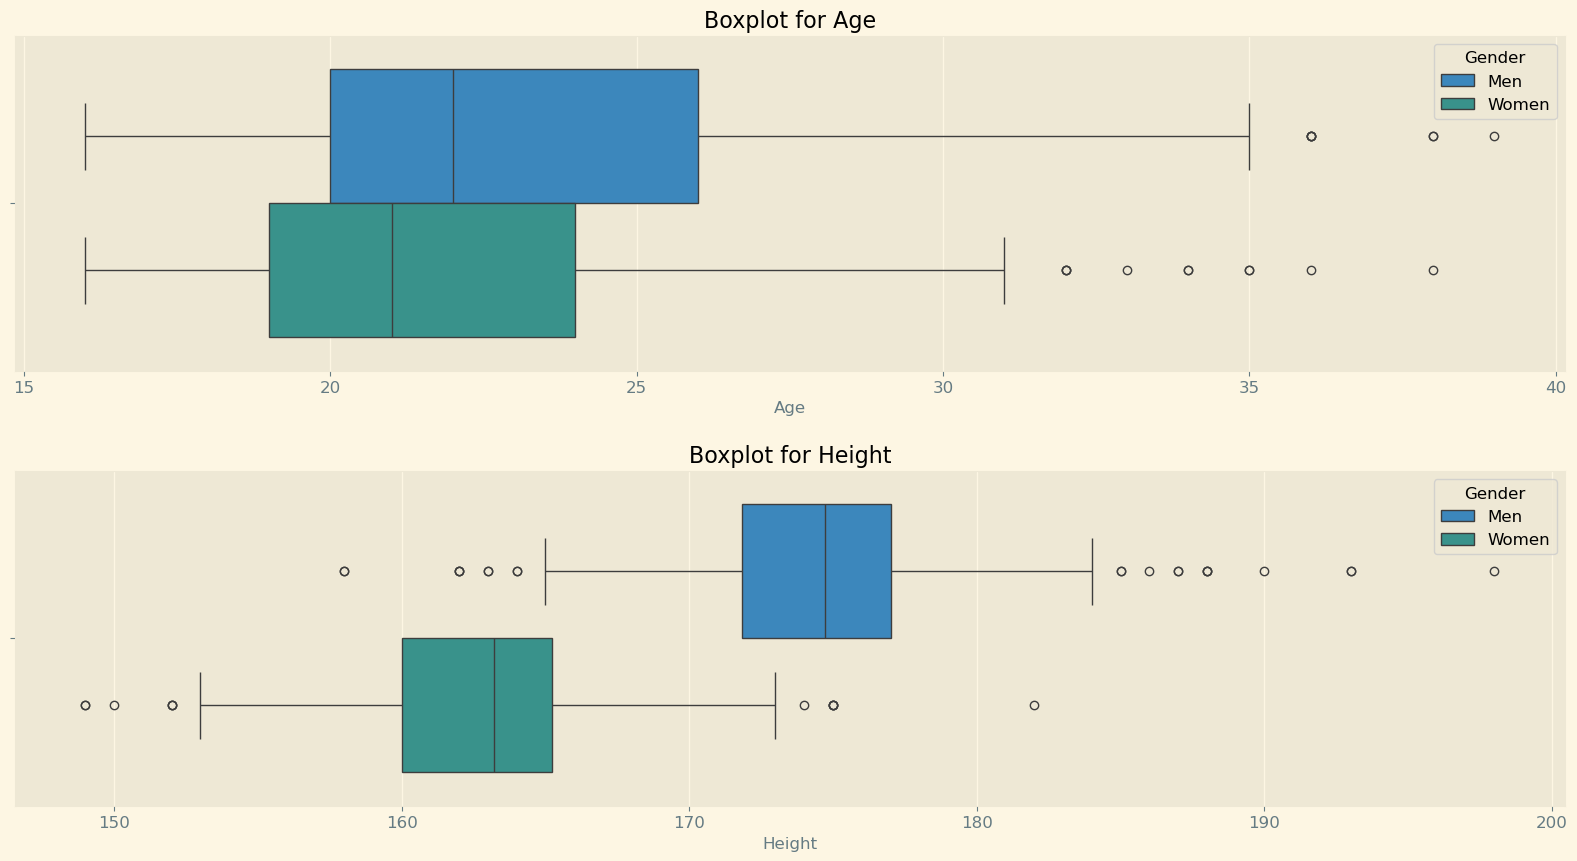

In [46]:
# Age boxplot
plt.subplot(2, 1, 1)
sns.boxplot(data=athletes_v2, x='Age', hue='Gender')
plt.title('Boxplot for Age')

# Height boxplot
plt.subplot(2, 1, 2)
sns.boxplot(data=athletes_v2, x='Height', hue='Gender')
plt.title('Boxplot for Height')

plt.subplots_adjust(hspace=0.3)

plt.savefig(f'graphs/01_athlete_boxplot.png')
plt.show()

In [47]:
# Count the Men and Women athletes
print(athletes_v2['Gender'].value_counts())
print(athletes_v2['Gender'].value_counts(normalize=True))

Gender
Men      425
Women    325
Name: count, dtype: int64
Gender
Men      0.566667
Women    0.433333
Name: proportion, dtype: float64


In [48]:
# Count the numbers of participating countries
print("Total participating countries during the 2023 world cups:", len(athletes_v2['Country'].unique()))

Total participating countries during the 2023 world cups: 67


In [49]:
# Top 10 contries with most participating athletesd
athletes_v2['Country'].value_counts().head(10)

Country
JPN    48
FRA    45
USA    44
KOR    38
ITA    35
INA    35
CHN    34
GER    31
AUT    30
SLO    24
Name: count, dtype: int64

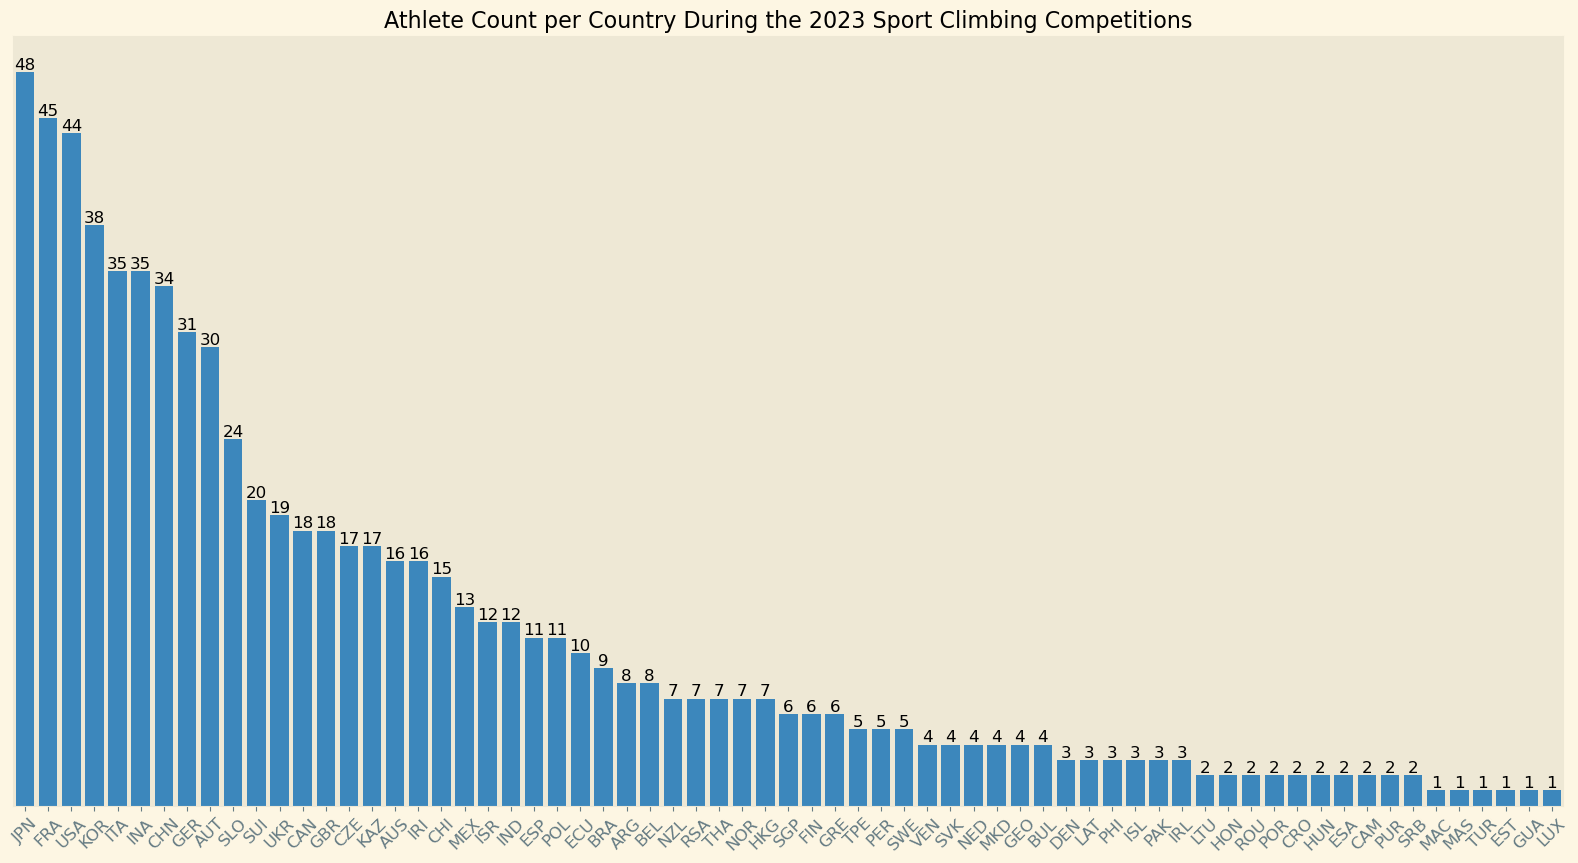

In [50]:
data = athletes_v2['Country'].value_counts()
title = "Athlete Count per Country During the 2023 Sport Climbing Competitions"

ax = sns.barplot(data=data)

for c in ax.containers:
    ax.bar_label(c)

plt.title(title)
plt.ylabel("")
plt.xlabel("")
plt.yticks([])
plt.xticks(rotation=45)

title = title.replace(" ", "_")
plt.savefig(f'graphs/02_{title}.png')
plt.show()

#### Boulder

In [51]:
boulder_df.shape

(1232, 9)

In [52]:
boulder_df.groupby(['event_name', 'Date1', 'Gender'])['Country'].count().reset_index().sort_values(by="Date1")

,event_name,Date1,Gender,Country
4,Hachioji_2023,2023-04-23,Men,91
5,Hachioji_2023,2023-04-23,Women,74
12,Seoul_2023,2023-04-30,Men,87
13,Seoul_2023,2023-04-30,Women,78
10,Salt_Lake_City_2023,2023-05-21,Men,64
11,Salt_Lake_City_2023,2023-05-21,Women,61
8,Prague_2023,2023-06-04,Men,94
9,Prague_2023,2023-06-04,Women,73
2,Brixen_2023,2023-06-11,Men,90
3,Brixen_2023,2023-06-11,Women,79


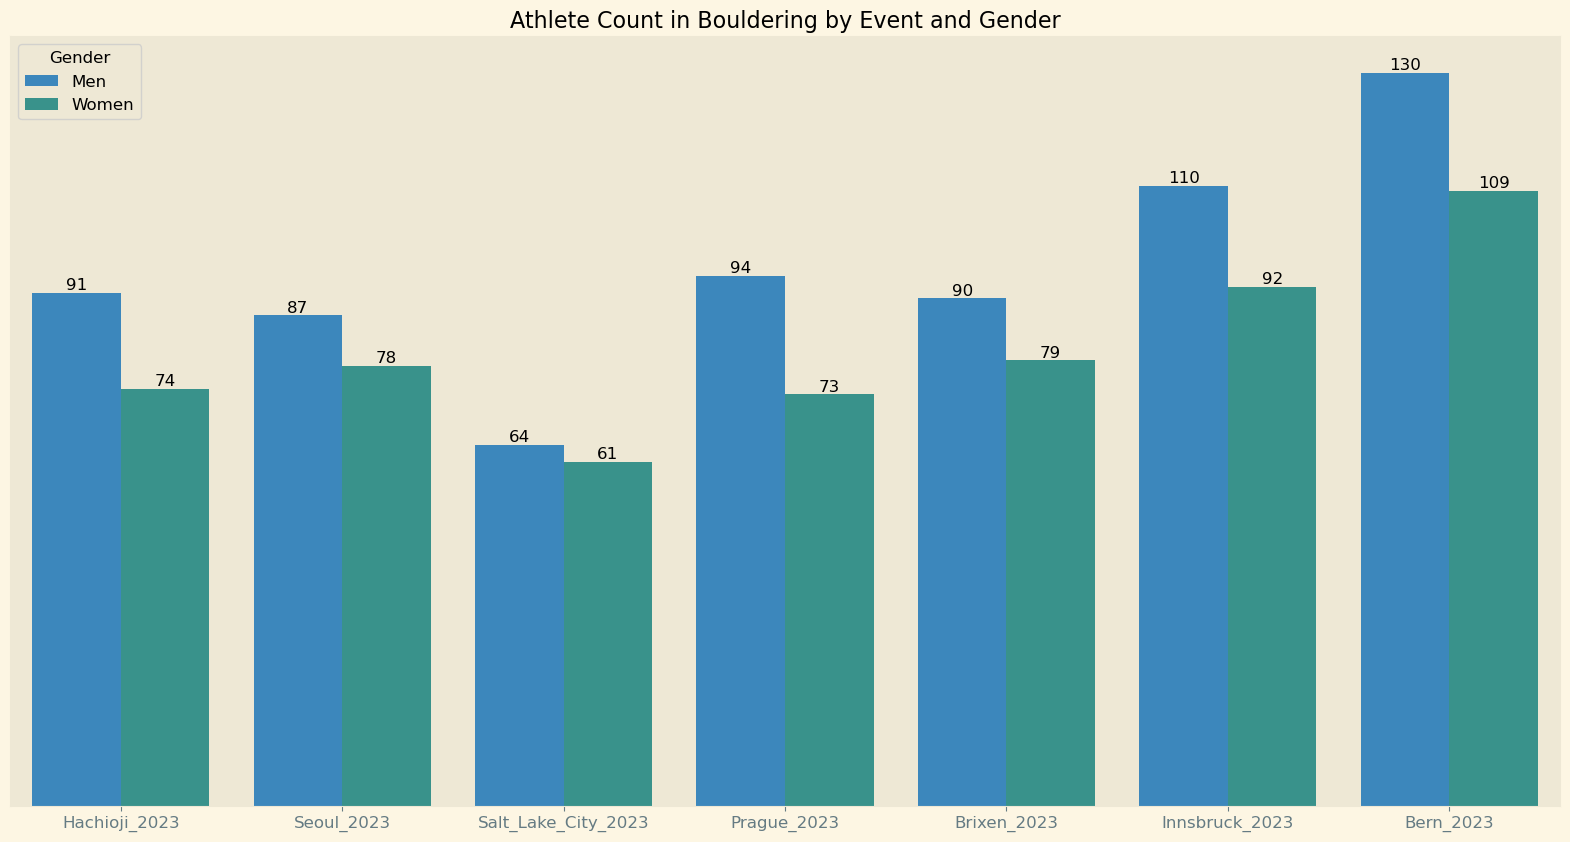

In [53]:
data = boulder_df.groupby(['event_name', 'Date1', 'Gender'])['Country'].count().reset_index().sort_values(by="Date1")
title = "Athlete Count in Bouldering by Event and Gender"

ax = sns.barplot(x='event_name', y='Country', hue='Gender', data=data)

for c in ax.containers:
    ax.bar_label(c)

plt.title(title)
plt.ylabel("")
plt.xlabel("")
plt.yticks([])

# Save the plot as a PNG file
title = title.replace(" ", "_")
plt.savefig(f'graphs/03_{title}.png')
plt.show()


#### Lead

In [54]:
lead_df.shape

(1133, 9)

In [55]:
lead_df.groupby(['event_name','Gender'])['Country'].count()

event_name      Gender
Bern_2023       Men       125
                Women     100
Briançon_2023   Men        76
                Women      67
Chamonix_2023   Men        92
                Women      83
Innsbruck_2023  Men       110
                Women      89
Koper_2023      Men        59
                Women      62
Villars_2023    Men        94
                Women      83
Wujiang_2023    Men        48
                Women      45
Name: Country, dtype: int64

In [56]:
lead_df.groupby(['event_name','Date1'])['Country'].count().reset_index().sort_values(by='Date1')

,event_name,Date1,Country
3,Innsbruck_2023,2023-06-18,199
5,Villars_2023,2023-07-02,177
2,Chamonix_2023,2023-07-09,175
1,Briançon_2023,2023-07-15,143
0,Bern_2023,2023-08-12,225
4,Koper_2023,2023-09-09,121
6,Wujiang_2023,2023-09-24,93


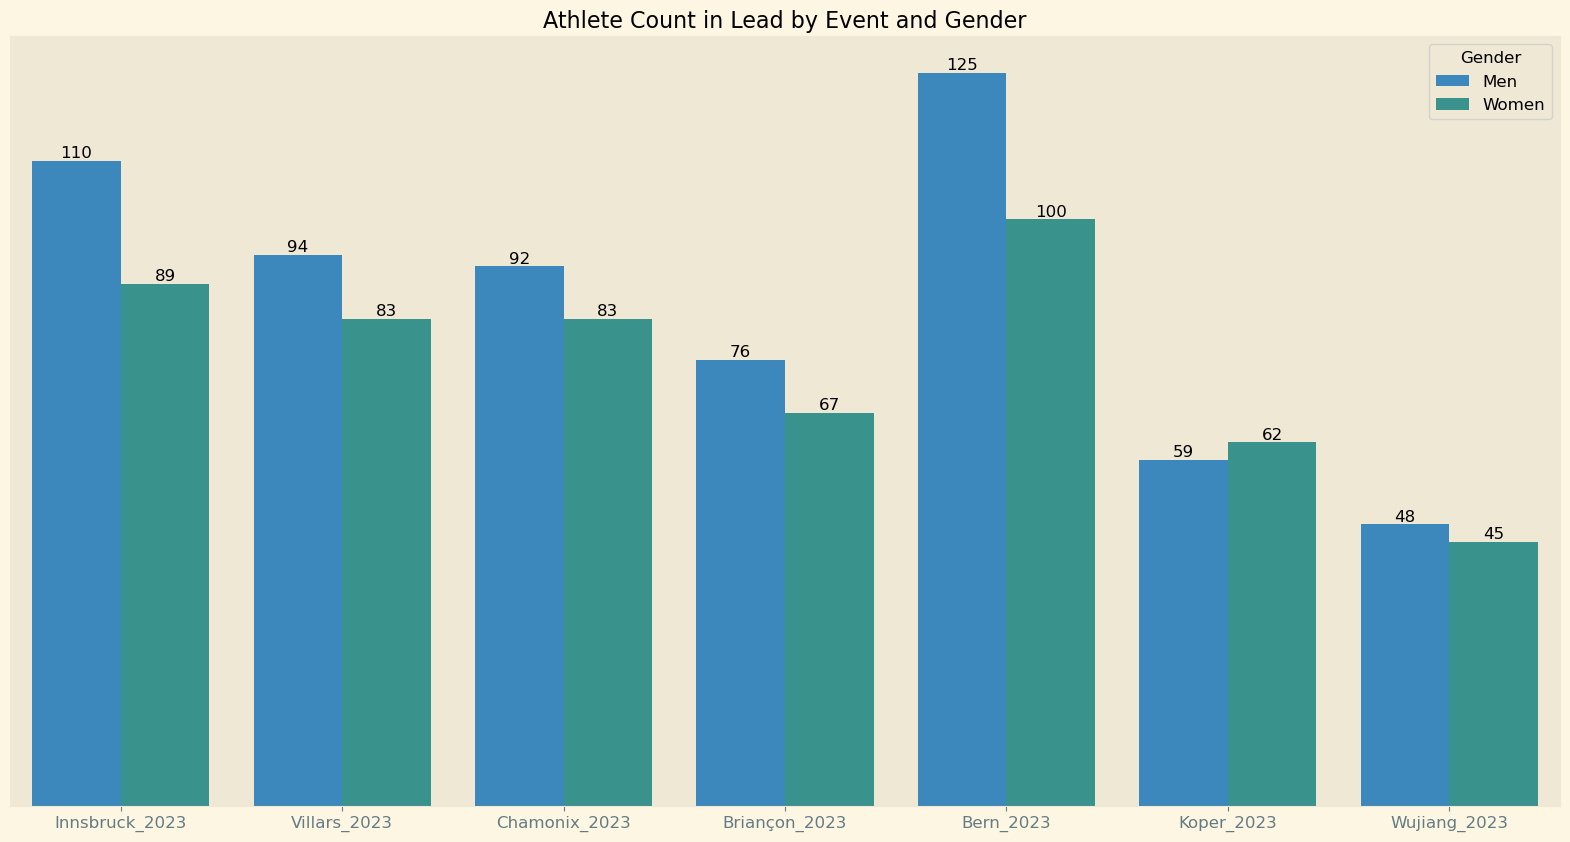

In [57]:
data = lead_df.groupby(['event_name', 'Date1', 'Gender'])['Country'].count().reset_index().sort_values(by="Date1")

title = "Athlete Count in Lead by Event and Gender"

ax = sns.barplot(x='event_name', y='Country', hue='Gender', data=data)

for c in ax.containers:
    ax.bar_label(c)

plt.title(title)
plt.ylabel("")
plt.xlabel("")
plt.yticks([])

# Save the plot as a PNG file
title = title.replace(" ", "_")
plt.savefig(f'graphs/04_{title}.png')
plt.show()


#### Speed

In [58]:
speed_df.shape

(833, 10)

In [59]:
speed_df.groupby(['event_name', 'Gender'])['Country'].count()

event_name           Gender
Bern_2023            Men       77
                     Women     58
Chamonix_2023        Men       77
                     Women     52
Jakarta_2023         Men       72
                     Women     47
Salt_Lake_City_2023  Men       64
                     Women     48
Seoul_2023           Men       72
                     Women     50
Villars_2023         Men       77
                     Women     54
Wujiang_2023         Men       50
                     Women     35
Name: Country, dtype: int64

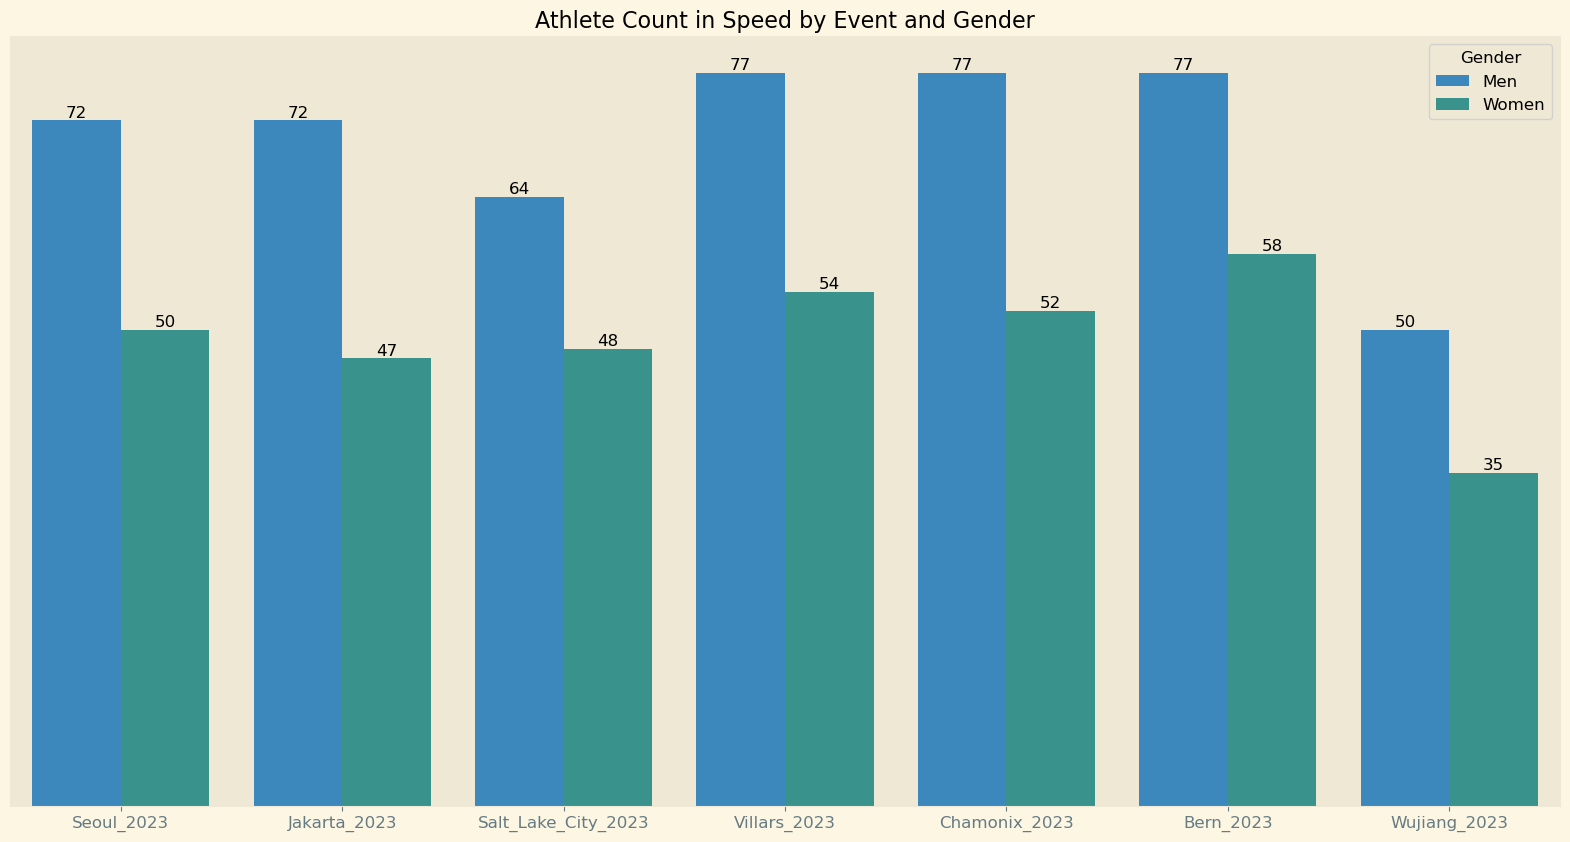

In [60]:
data = speed_df.groupby(['event_name', 'Date1', 'Gender'])['Country'].count().reset_index().sort_values(by="Date1")

title = "Athlete Count in Speed by Event and Gender"

ax = sns.barplot(x='event_name', y='Country', hue='Gender', data=data)

for c in ax.containers:
    ax.bar_label(c)

plt.title(title)
plt.ylabel("")
plt.xlabel("")
plt.yticks([])

# Save the plot as a PNG file
title = title.replace(" ", "_")
plt.savefig(f'graphs/05_{title}.png')
plt.show()

In [61]:
speed_df

,Rank,Country,Qualification,Final,event_name,Gender,Name,Date1,qlf1,final1
0,1.0,INA,4.98 (wr) (asr),5.01,Seoul_2023,Men,VEDDRIQ LEONARDO,2023-04-30,4.980,5.01
1,2.0,CHN,5.40,5.12,Seoul_2023,Men,JINBAO LONG,2023-04-30,5.400,5.12
2,3.0,CHN,5.17,5.11,Seoul_2023,Men,XINSHANG WANG,2023-04-30,5.170,5.11
3,4.0,CHN,5.130,6.37,Seoul_2023,Men,JIANGUO LONG,2023-04-30,5.130,6.37
4,5.0,KOR,5.131,8.69 (5.131),Seoul_2023,Men,EUNCHEOL SHIN,2023-04-30,5.131,8.69
...,...,...,...,...,...,...,...,...,...,...
832,31.0,KOR,9.73,NaN,Wujiang_2023,Women,YENA PI,2023-09-24,9.730,NaN
833,32.0,JPN,9.88,NaN,Wujiang_2023,Women,KARIN HAYASHI,2023-09-24,9.880,NaN
834,33.0,IND,10.17,NaN,Wujiang_2023,Women,SHIVPREET PANNU,2023-09-24,10.170,NaN
835,34.0,IND,10.20,NaN,Wujiang_2023,Women,ANISHA VERMA,2023-09-24,10.200,NaN


In [62]:
speed_df.groupby(['Gender'])[['qlf1','final1']].describe()

qlf1                                                        final1  \
        count      mean       std   min     25%     50%   75%    max  count   
Gender                                                                        
Men     462.0  5.956340  0.923299  4.97  5.3885  5.6730  6.18  12.13  108.0   
Women   336.0  8.316402  1.444823  6.30  7.3375  7.9915  8.95  16.62  112.0   

                                                              
            mean       std   min    25%    50%    75%    max  
Gender                                                        
Men     5.864870  1.048599  4.95  5.195  5.340  6.355   9.22  
Women   7.517875  1.135870  6.25  6.855  7.245  7.640  12.81

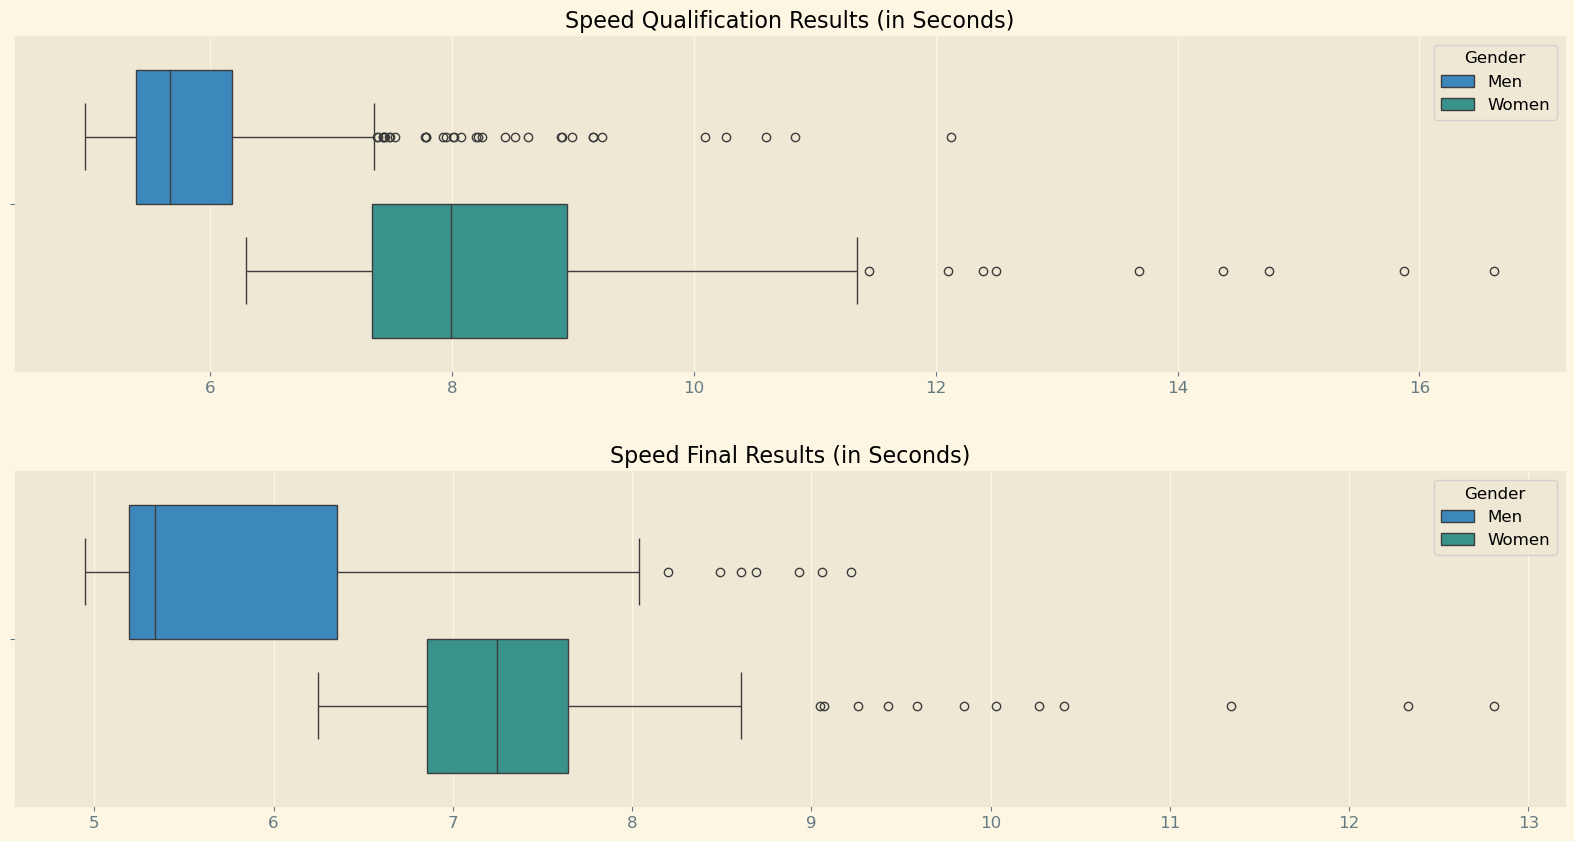

In [63]:
# Qualification boxplot
plt.subplot(2, 1, 1)
sns.boxplot(data=speed_df, x='qlf1', hue='Gender')
plt.title('Speed Qualification Results (in Seconds)')
plt.xlabel("")

# Final boxplot
plt.subplot(2, 1, 2)
sns.boxplot(data=speed_df, x='final1', hue='Gender')
plt.title('Speed Final Results (in Seconds)')
plt.xlabel("")

plt.subplots_adjust(hspace=0.3)

plt.savefig(f'graphs/06_speed_boxplot.png')
plt.show()

### Data Analysis

#### Number of medals won during 2023

In [64]:
# Number of medals won during 2033
boulder_podium = boulder_df[(boulder_df['Rank'] == 1) | (boulder_df['Rank'] == 2) | (boulder_df['Rank'] == 3)].reset_index(drop=True)
boulder_podium['Category'] = 'Boulder'
lead_podium = lead_df[(lead_df['Rank'] == 1) | (lead_df['Rank'] == 2) | (lead_df['Rank'] == 3)].reset_index(drop=True)
lead_podium['Category'] = 'Lead'
speed_podium = speed_df[(speed_df['Rank'] == 1) | (speed_df['Rank'] == 2) | (speed_df['Rank'] == 3)].reset_index(drop=True)
speed_podium['Category'] = 'Speed'

all_categories = pd.concat([boulder_podium, lead_podium, speed_podium])

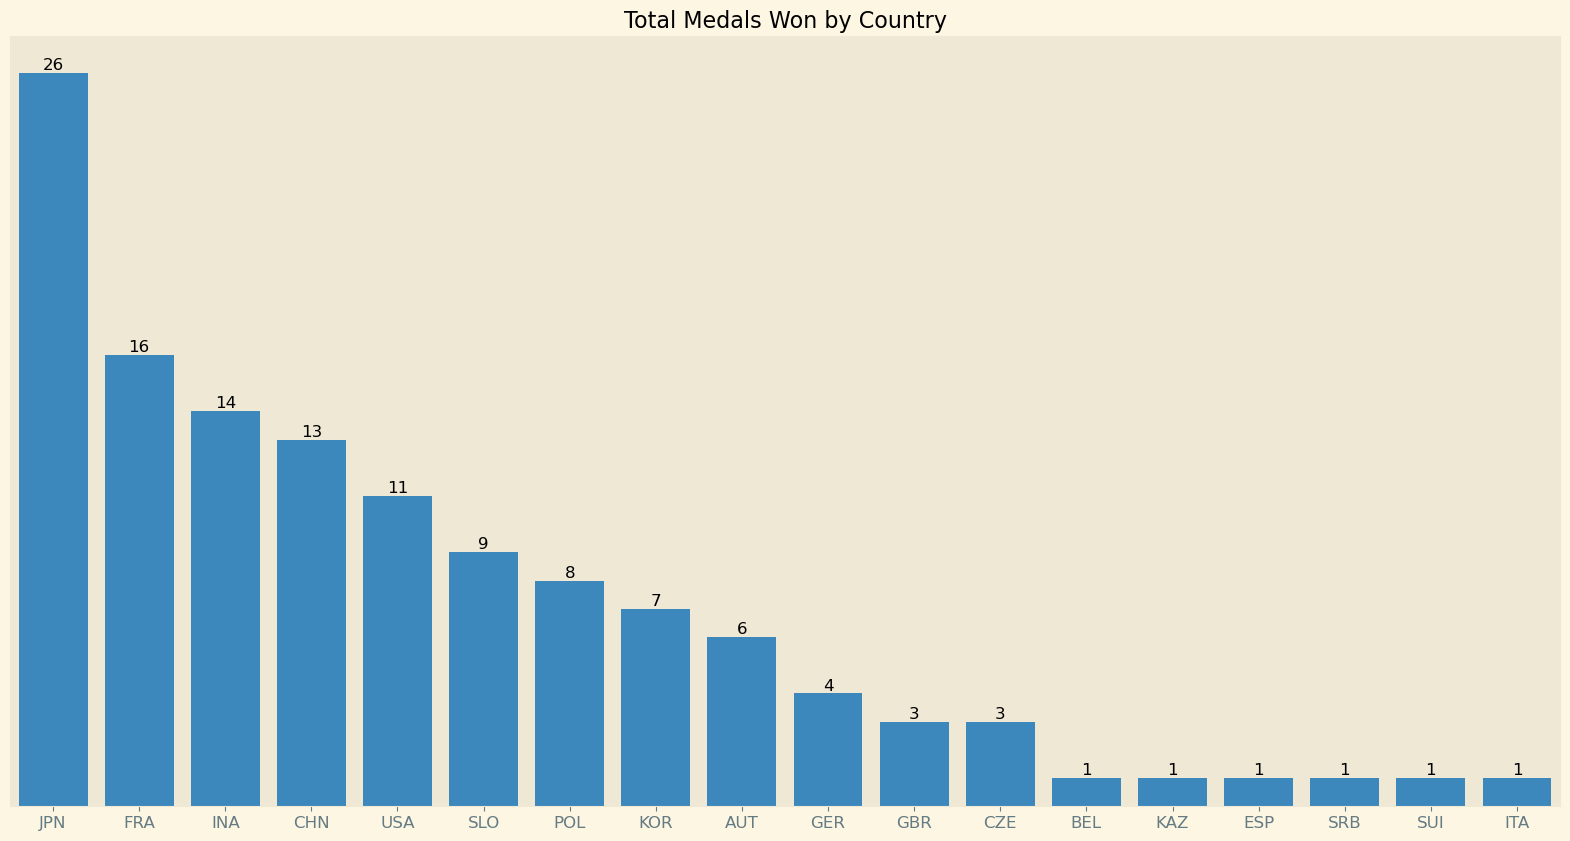

In [65]:
# Get the number of medals won by country
data = all_categories.groupby(['Country'])['Rank'].count().sort_values(ascending=False).reset_index()
title = "Total Medals Won by Country"

ax = sns.barplot(x='Country', y='Rank', data=data)

for c in ax.containers:
    ax.bar_label(c)

plt.title(title)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])

# Save the plot as a PNG file
title = title.replace(" ", "_")
plt.savefig(f'graphs/07_{title}.png')
plt.show()

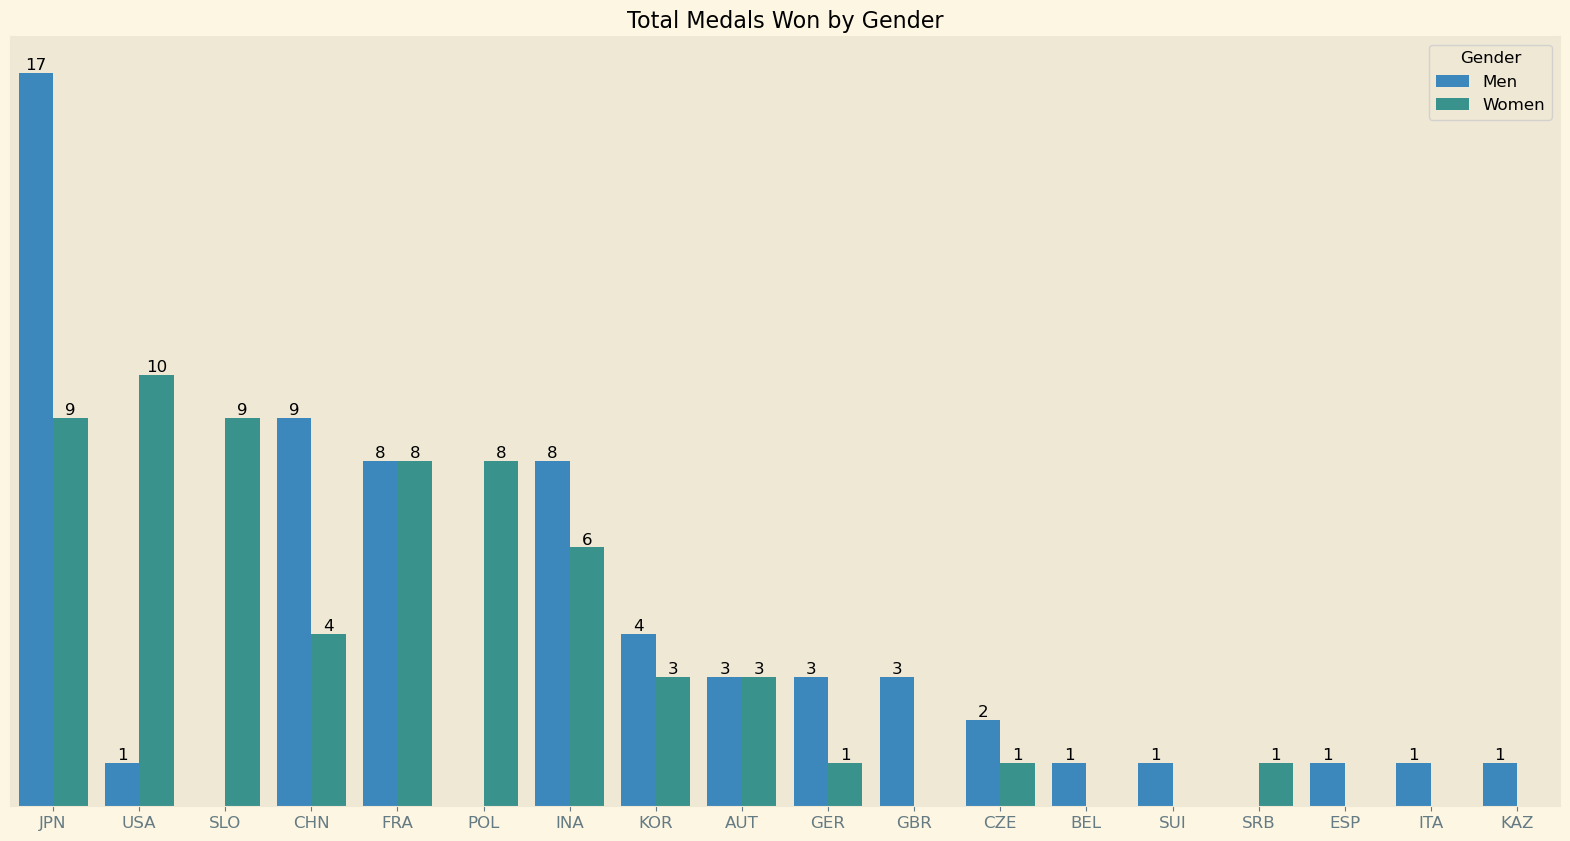

In [66]:
# Get the medals won by gender
data = all_categories.groupby(['Country', 'Gender'])['Rank'].count().reset_index().sort_values(by='Rank' ,ascending=False)

title = "Total Medals Won by Gender"

ax = sns.barplot(x='Country', y='Rank', hue='Gender', data=data)

for c in ax.containers:
    ax.bar_label(c)

plt.title(title)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])

# Save the plot as a PNG file
title = title.replace(" ", "_")
plt.savefig(f'graphs/08_{title}.png')
plt.show()

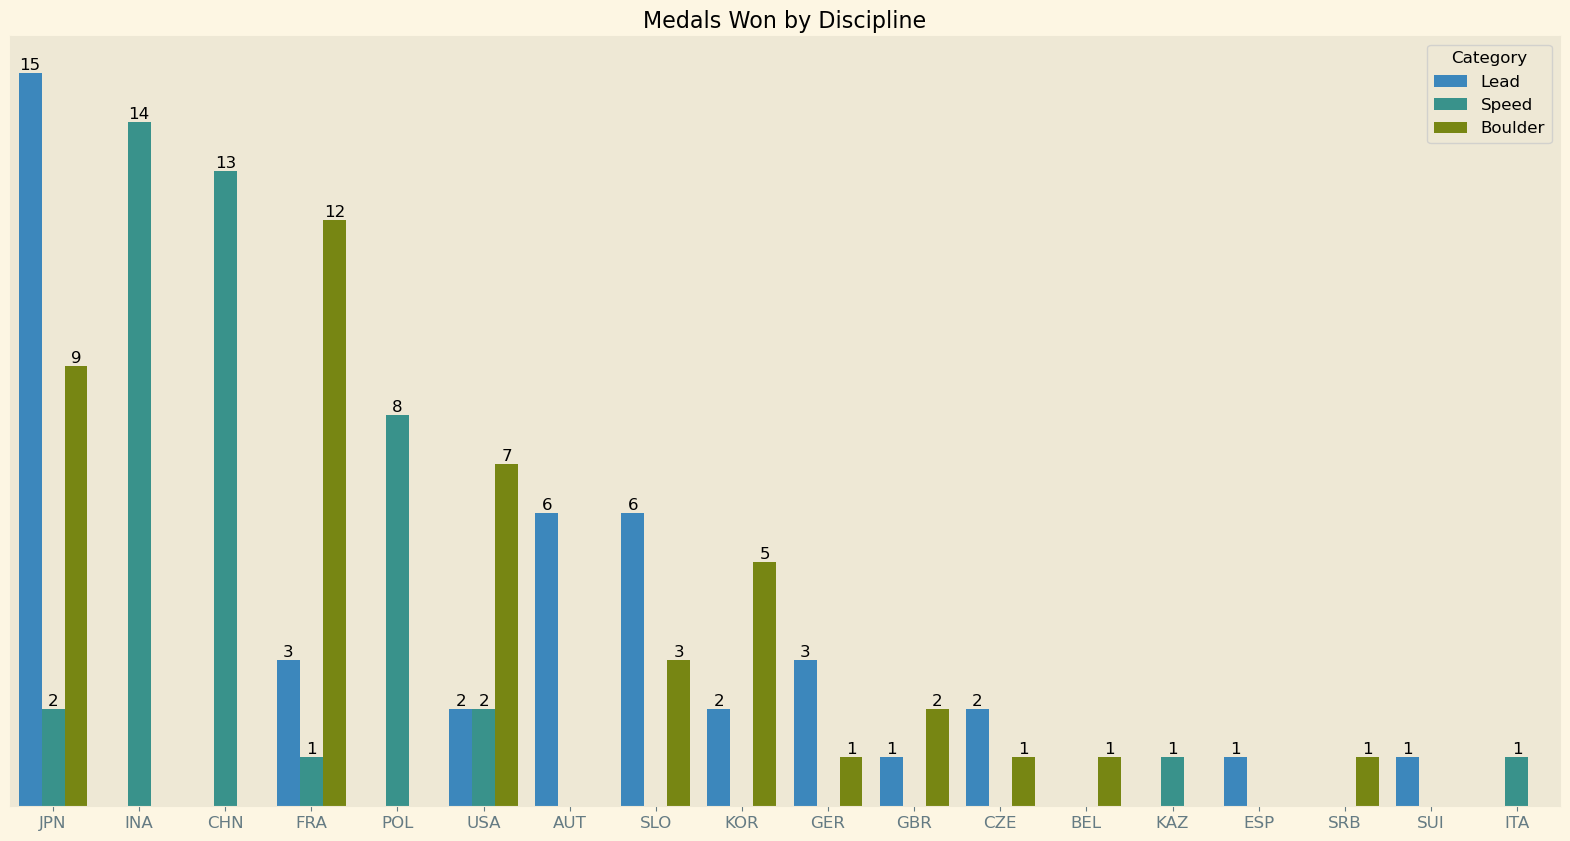

In [67]:
# Get the total number of medals won by category (boulder, lead, speed)
data = all_categories.groupby(['Country', 'Category'])['Rank'].count().reset_index().sort_values(by='Rank', ascending=False)

title = "Medals Won by Discipline"

ax = sns.barplot(x='Country', y='Rank', hue='Category', data=data)

for c in ax.containers:
    ax.bar_label(c)

plt.title(title)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])

# Save the plot as a PNG file
title = title.replace(" ", "_")
plt.savefig(f'graphs/09_{title}.png')
plt.show()

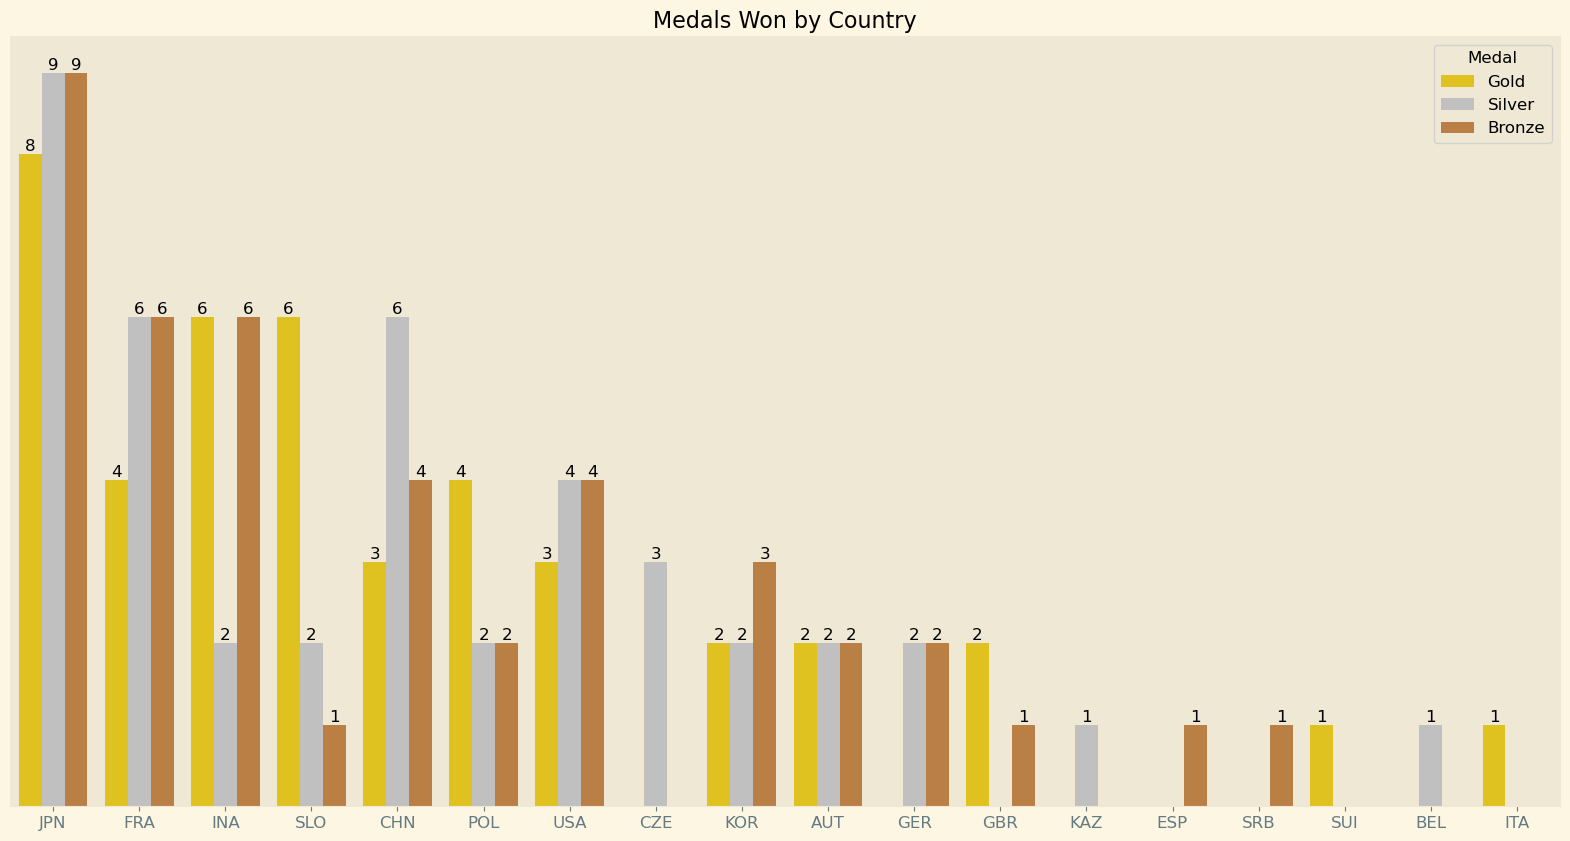

In [68]:
# Make column with Gold, Silver, Bronze categorical values
all_categories['Medal'] = all_categories['Rank'].map({1: 'Gold', 2:'Silver', 3: 'Bronze'})
medal_order =['Gold', 'Silver', 'Bronze']
all_categories['Medal'] = pd.Categorical(all_categories['Medal'], categories=medal_order, ordered=True)
data = all_categories.groupby(['Country', 'Medal'], observed=True)['Rank'].count().reset_index().sort_values(by='Rank', ascending=False)

title = "Medals Won by Country"

color_palette = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32'}
ax = sns.barplot(x='Country', y='Rank', hue='Medal', data=data, palette=color_palette)


for c in ax.containers:
    ax.bar_label(c)

plt.title(title)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])

# Save the plot as a PNG file
title = title.replace(" ", "_")
plt.savefig(f'graphs/10_{title}.png')
plt.show()

#### Boulder: The amount of problems solved by each participant

In [69]:
# Make new columns with the numeric value per each round. E.g: QT: Qualification Tops reached
boulder_df['QT'] = boulder_df['Qualification'].str.split("t", n=1, expand=True)[0].astype('Int32')
boulder_df['QZ'] = boulder_df['Qualification'].str.split("t", n=1, expand=True)[1].str.split("z", n=1, expand=True)[0].astype('Int32')

boulder_df['SMT'] = boulder_df['Semi-final'].str.split("t", n=1, expand=True)[0].astype('Int32')
boulder_df['SMZ'] = boulder_df['Semi-final'].str.split("t", n=1, expand=True)[1].str.split("z", n=1, expand=True)[0].astype('Int32')

boulder_df['FT'] = boulder_df['Final'].str.split("t", n=1, expand=True)[0].astype('Int32')
boulder_df['FZ'] = boulder_df['Final'].str.split("t", n=1, expand=True)[1].str.split("z", n=1, expand=True)[0].astype('Int32')

b_tops = boulder_df.groupby(['event_name', 'Gender'])[['QT','SMT', 'FT']].agg(['count', 'min', 'max'])
b_tops

QT           SMT            FT        
                           count min max count min max count min max
event_name          Gender                                          
Bern_2023           Men      130   0   5    20   0   4     6   0   3
                    Women    109   0   5    20   1   4     6   1   4
Brixen_2023         Men       90   0   5    20   0   3     6   1   3
                    Women     79   0   5    20   0   4     6   1   4
Hachioji_2023       Men       91   0   5    20   0   2     6   0   2
                    Women     74   0   5    21   0   2     6   0   3
Innsbruck_2023      Men      110   0   5    20   0   4     6   0   3
                    Women     92   0   5    20   0   4     6   0   4
Prague_2023         Men       94   0   5    20   0   3     6   1   4
                    Women     73   0   5    20   0   4     6   0   3
Salt_Lake_City_2023 Men       64   0   5    22   0   4     6   2   4
                    Women     61   0   5    20   0   4     6   0   4
Seoul_2023          Men       87   0   4    19   0   2    19   0   2
                    Women     78   0   5    20   0   2    20   0   2

In [70]:
b_zones = boulder_df.groupby(['event_name', 'Gender'])[['QZ','SMZ', 'FZ']].agg(['count', 'min', 'max'])
b_zones

QZ           SMZ            FZ        
                           count min max count min max count min max
event_name          Gender                                          
Bern_2023           Men      130   0   5    20   1   4     6   2   4
                    Women    109   0   5    20   2   4     6   2   4
Brixen_2023         Men       90   0   5    20   2   4     6   2   4
                    Women     79   0   5    20   3   4     6   2   4
Hachioji_2023       Men       91   0   5    20   1   4     6   3   3
                    Women     74   0   5    21   0   4     6   1   4
Innsbruck_2023      Men      110   0   5    20   2   4     6   0   3
                    Women     92   0   5    20   1   4     6   2   4
Prague_2023         Men       94   0   5    20   1   4     6   3   4
                    Women     73   0   5    20   1   4     6   2   4
Salt_Lake_City_2023 Men       64   1   5    22   3   4     6   3   4
                    Women     61   0   5    20   3   4     6   3   4
Seoul_2023          Men       87   0   5    19   0   3    19   0   3
                    Women     78   0   5    20   0   4    20   0   4

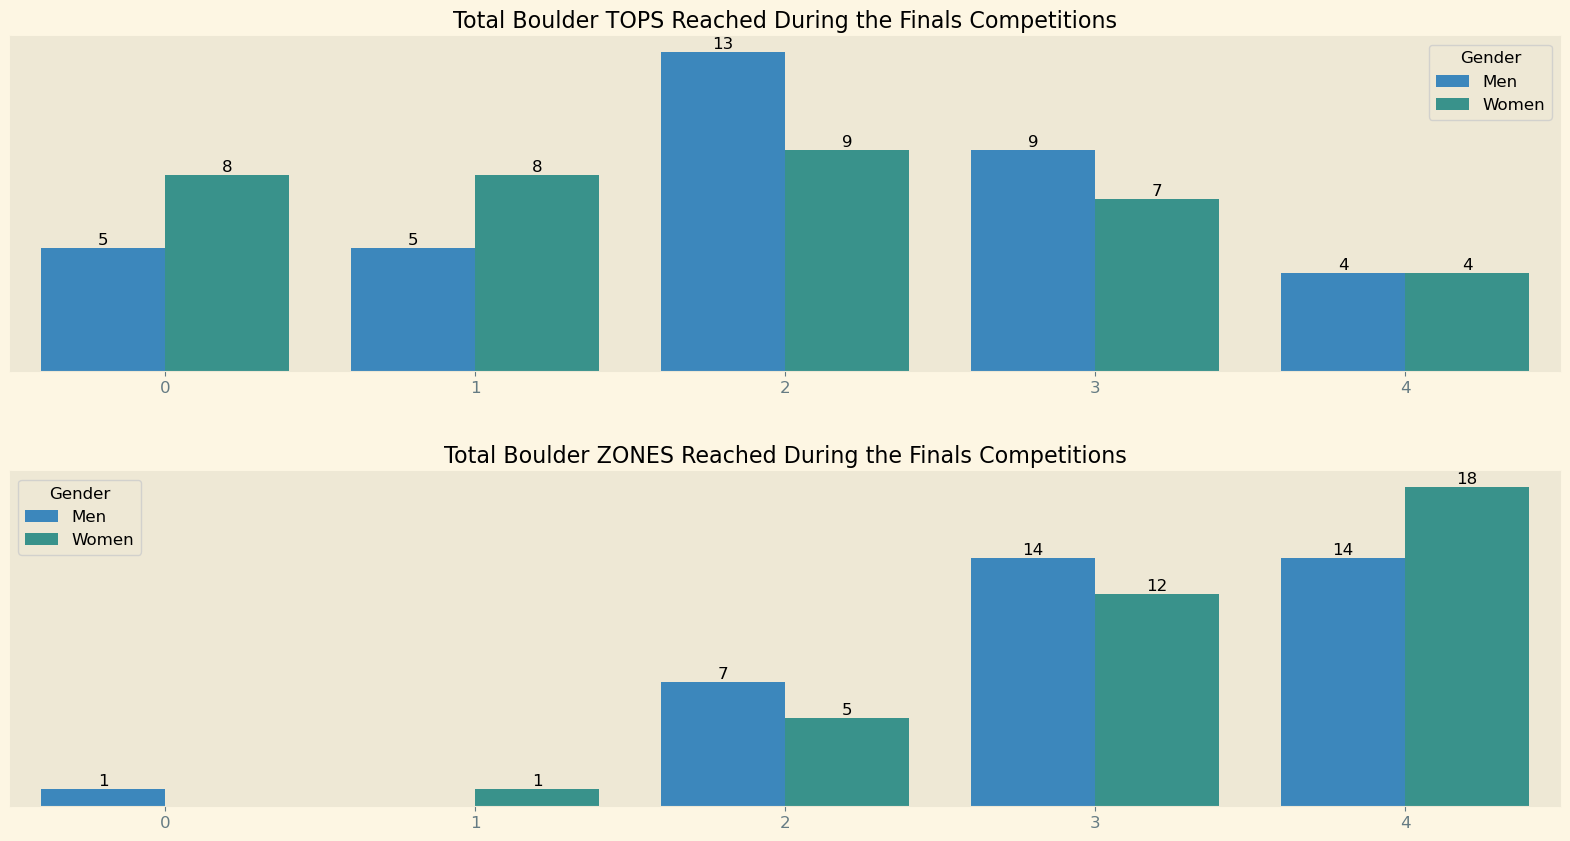

In [71]:
# Remove Seoul 2023 boulder competition since the final was cancelled
b_final_top_subset = boulder_df[~(boulder_df['event_name'] == 'Seoul_2023')]

# Total Boulder TOPS
plt.subplot(2, 1, 1)

data_top = b_final_top_subset.groupby(['Gender', 'FT'])['Country'].count().reset_index()
title_top = "Total Boulder TOPS Reached During the Finals Competitions"

ax_top = sns.barplot(data=data_top, x='FT', y='Country', hue='Gender')

for c in ax_top.containers:
    ax_top.bar_label(c)

ax_top.set_title(title_top)
ax_top.set_ylabel("")
ax_top.set_xlabel("")
ax_top.set_yticks([])

# Remove Seoul 2023 boulder competition since the final was cancelled
b_final_zones_subset = boulder_df[~(boulder_df['event_name'] == 'Seoul_2023')]

# Total Boulder ZONES
plt.subplot(2, 1, 2)

data_zones = b_final_zones_subset.groupby(['Gender', 'FZ'])['Country'].count().reset_index()
title_zones = "Total Boulder ZONES Reached During the Finals Competitions"

ax_zones = sns.barplot(data=data_zones, x='FZ', y='Country', hue='Gender')

for c in ax_zones.containers:
    ax_zones.bar_label(c)

ax_zones.set_title(title_zones)
ax_zones.set_ylabel("")
ax_zones.set_xlabel("")
ax_zones.set_yticks([])

plt.subplots_adjust(hspace=0.3)

# Save the plot as a PNG file
plt.savefig(f'graphs/11_Boulder_Final_Tops_Zones.png')

# Show the plot
plt.show()

In [83]:
# Any flashed boulder solved during the qualifications round
boulder_df[boulder_df['Qualification'] == '5t5z 5 5'][['Rank', 'Name', 'Country', 'event_name']]

,Rank,Name,Country,event_name
93,3.0,ANON MATSUFUJI,JPN,Hachioji_2023
337,6.0,HANNES VAN DUYSEN,BEL,Salt_Lake_City_2023
397,1.0,NATALIA GROSSMAN,USA,Salt_Lake_City_2023


In [84]:
# Any flashed boulder solved during the semi-finals round
boulder_df[boulder_df['Semi-final'] == '4t4z 4 4'][['Rank', 'Name', 'Country', 'event_name']]

,Rank,Name,Country,event_name
1131,1.0,JANJA GARNBRET,SLO,Bern_2023


In [85]:
# Any flashed boulder solved during the finals round
boulder_df[boulder_df['Final'] == '4t4z 4 4'][['Rank', 'Name', 'Country', 'event_name']]

,Rank,Name,Country,event_name
907,1.0,JANJA GARNBRET,SLO,Innsbruck_2023
1131,1.0,JANJA GARNBRET,SLO,Bern_2023


#### Lead: the amount of tops or highest piece achieved

In [75]:
lead_final_tops = lead_df[lead_df['Final'] == 'top'].sort_values(by='Gender')[['Name', 'Country','event_name', 'Gender']].reset_index(drop=True)
lead_final_tops

,Name,Country,event_name,Gender
0,TOBY ROBERTS,GBR,Chamonix_2023,Men
1,SORATO ANRAKU,JPN,Briançon_2023,Men
2,SORATO ANRAKU,JPN,Koper_2023,Men
3,JANJA GARNBRET,SLO,Villars_2023,Women
4,AI MORI,JPN,Bern_2023,Women
5,JANJA GARNBRET,SLO,Bern_2023,Women
6,JANJA GARNBRET,SLO,Koper_2023,Women


In [76]:
lead_semi_tops = lead_df[lead_df['Semi-final'] == 'top'].sort_values(by='Gender')[['Name', 'Country','event_name', 'Gender']].reset_index(drop=True)
lead_semi_tops

,Name,Country,event_name,Gender
0,COLIN DUFFY,USA,Villars_2023,Men
1,SORATO ANRAKU,JPN,Villars_2023,Men
2,SORATO ANRAKU,JPN,Briançon_2023,Men
3,MASAHIRO HIGUCHI,JPN,Briançon_2023,Men
4,SORATO ANRAKU,JPN,Wujiang_2023,Men
5,TAISEI HOMMA,JPN,Wujiang_2023,Men
6,JANJA GARNBRET,SLO,Villars_2023,Women
7,AI MORI,JPN,Wujiang_2023,Women
8,NATSUKI TANII,JPN,Wujiang_2023,Women


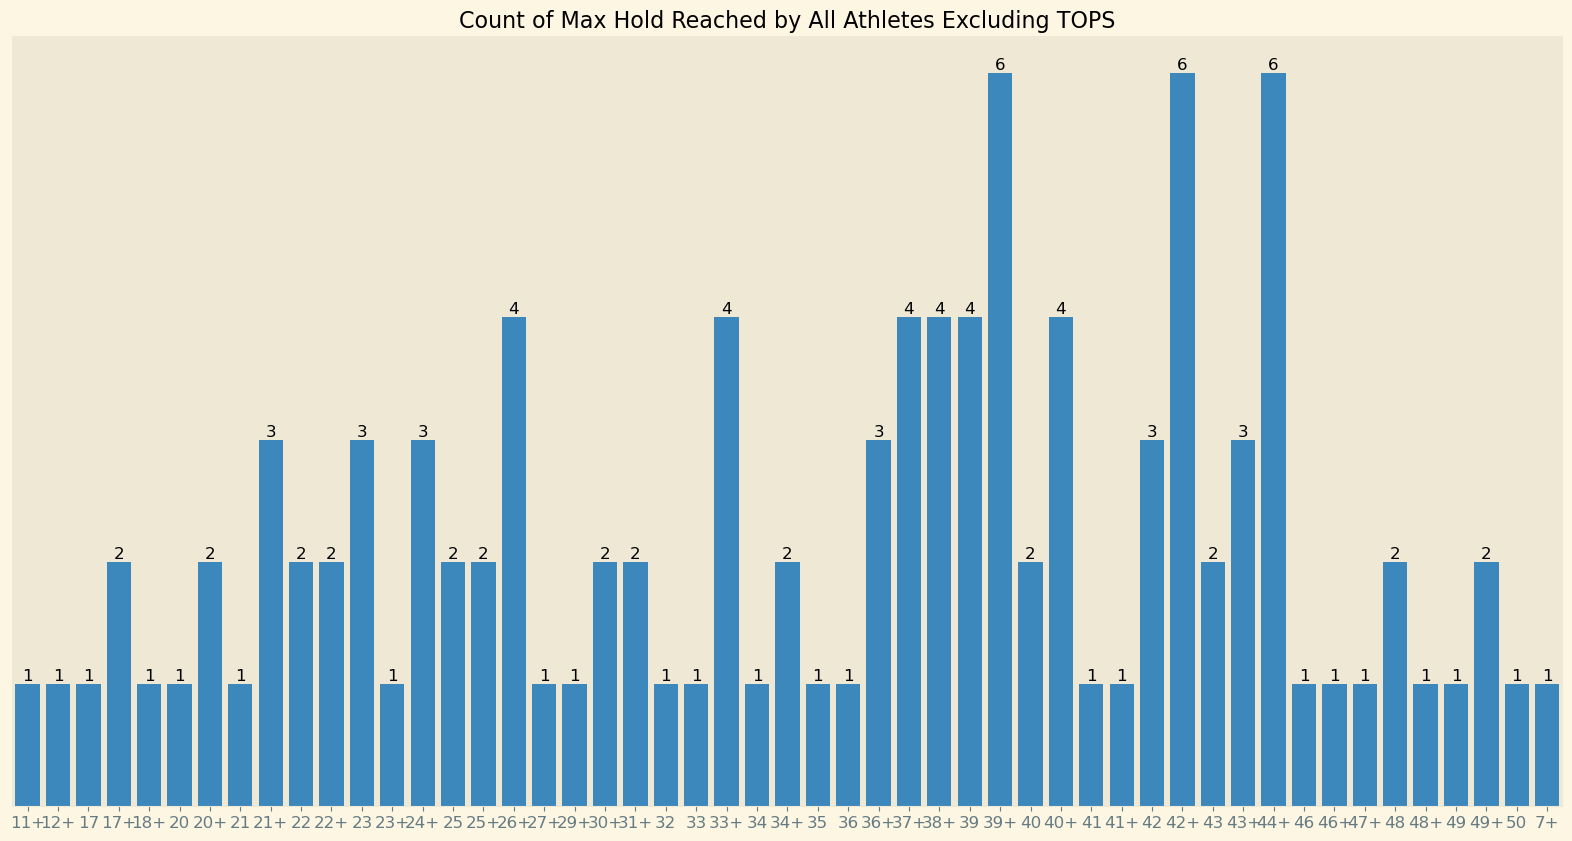

In [115]:
# Graph displaying the highest hold reached during the finals excluding the TOP
data = lead_df[(lead_df['Final'] != 'top')]
data = data.drop(columns=['Qualification'])

title = "Count of Max Hold Reached by All Athletes Excluding TOPS"

ax = sns.barplot(data=data.groupby(['Final'])['Rank'].count().reset_index(), x='Final', y='Rank')

for c in ax.containers:
    ax.bar_label(c)

ax.set_title(title)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_yticks([])

# Save the plot as a PNG file
plt.savefig(f'graphs/12_{title}.png')

# Show the plot
plt.show()

#### Speed world records

In [118]:
records = ['wr', 'asr', 'ocr', 'par', 'afr', 'er']
filtered_rows = speed_df[speed_df.apply(lambda row: any(row.str.contains(fr'\b(?:{"|".join(records)})\b', na=False, regex=True)), axis=1)]
speed_records = filtered_rows.sort_values(by=['Date1', 'Gender'])[['Rank', 'Name',	'Country', 'Qualification',	'Final', 'event_name',	'Gender']]
speed_records

,Rank,Name,Country,Qualification,Final,event_name,Gender
0,1.0,VEDDRIQ LEONARDO,INA,4.98 (wr) (asr),5.01,Seoul_2023,Men
7,8.0,MATTEO ZURLONI,ITA,5.230 (er),8.04 (5.230),Seoul_2023,Men
8,9.0,SAMUEL WATSON,USA,5.02 (par),5.42 (5.29),Seoul_2023,Men
50,51.0,JULIAN DAVID,NZL,6.43 (ocr),NaN,Seoul_2023,Men
72,1.0,ALEKSANDRA MIROSLAW,POL,6.37 (wr) (er),6.25 (wr) (er),Seoul_2023,Women
78,7.0,EMMA HUNT,USA,6.82 (par),6.86 (6.822),Seoul_2023,Women
195,2.0,DESAK MADE RITA KUSUMA DEWI,INA,6.65,6.52 (asr),Jakarta_2023,Women
200,7.0,EMMA HUNT,USA,6.97,6.79 (par),Jakarta_2023,Women
250,10.0,LUDOVICO FOSSALI,ITA,5.463,5.20 (er),Salt_Lake_City_2023,Men
290,50.0,JOSHUA BRUYNS,RSA,6.41 (afr),NaN,Salt_Lake_City_2023,Men


#### Do Athletes with greater number of participations tend to be finalist?

In [137]:
dfs = pd.concat([boulder_df, lead_df, speed_df])
dfs = dfs[['Rank', 'Name', 'Gender','event_name']]
# Convert Name to upper case
athletes_v2['Name'] = athletes_v2['Name'].str.upper()

In [139]:
merged_df = pd.merge(dfs, athletes_v2, on='Name', how='left')
merged_df.isna().sum()

Rank               0
Name               0
Gender_x           0
event_name         0
AthleteUrl        18
Gender_y          18
Height            18
Active            18
Participations    18
Age               18
Country           18
dtype: int64

In [140]:
merged_df = merged_df.dropna()

In [141]:
merged_df.head(10)

,Rank,Name,Gender_x,event_name,AthleteUrl,Gender_y,Height,Active,Participations,Age,Country
0,1.0,MEJDI SCHALCK,Men,Hachioji_2023,https://ifsc.results.info/#/athlete/11675,Men,172.0,2019,42.0,19.0,FRA
1,2.0,HANNES VAN DUYSEN,Men,Hachioji_2023,https://ifsc.results.info/#/athlete/373,Men,175.0,2018,53.0,19.0,BEL
2,3.0,PAUL JENFT,Men,Hachioji_2023,https://ifsc.results.info/#/athlete/547,Men,198.0,2017,58.0,20.0,FRA
3,4.0,KOKORO FUJII,Men,Hachioji_2023,https://ifsc.results.info/#/athlete/2272,Men,176.0,2010,141.0,31.0,JPN
4,5.0,SORATO ANRAKU,Men,Hachioji_2023,https://ifsc.results.info/#/athlete/13040,Men,168.0,2021,20.0,17.0,JPN
5,6.0,JONGWON CHON,Men,Hachioji_2023,https://ifsc.results.info/#/athlete/2052,Men,177.0,2012,109.0,27.0,KOR
6,7.0,DOHYUN LEE,Men,Hachioji_2023,https://ifsc.results.info/#/athlete/2101,Men,174.0,2016,50.0,21.0,KOR
7,8.0,MEICHI NARASAKI,Men,Hachioji_2023,https://ifsc.results.info/#/athlete/2307,Men,188.0,2013,77.0,24.0,JPN
8,9.0,EDVARDS GRUZITIS,Men,Hachioji_2023,https://ifsc.results.info/#/athlete/4168,Men,181.0,2018,53.0,20.0,LAT
9,10.0,TOMOA NARASAKI,Men,Hachioji_2023,https://ifsc.results.info/#/athlete/2276,Men,170.0,2011,114.0,27.0,JPN


In [142]:
merged_df = merged_df.drop(columns=['AthleteUrl', 'Gender_y', 'Active'])

In [143]:
merged_df.head(10)

,Rank,Name,Gender_x,event_name,Height,Participations,Age,Country
0,1.0,MEJDI SCHALCK,Men,Hachioji_2023,172.0,42.0,19.0,FRA
1,2.0,HANNES VAN DUYSEN,Men,Hachioji_2023,175.0,53.0,19.0,BEL
2,3.0,PAUL JENFT,Men,Hachioji_2023,198.0,58.0,20.0,FRA
3,4.0,KOKORO FUJII,Men,Hachioji_2023,176.0,141.0,31.0,JPN
4,5.0,SORATO ANRAKU,Men,Hachioji_2023,168.0,20.0,17.0,JPN
5,6.0,JONGWON CHON,Men,Hachioji_2023,177.0,109.0,27.0,KOR
6,7.0,DOHYUN LEE,Men,Hachioji_2023,174.0,50.0,21.0,KOR
7,8.0,MEICHI NARASAKI,Men,Hachioji_2023,188.0,77.0,24.0,JPN
8,9.0,EDVARDS GRUZITIS,Men,Hachioji_2023,181.0,53.0,20.0,LAT
9,10.0,TOMOA NARASAKI,Men,Hachioji_2023,170.0,114.0,27.0,JPN


In [144]:
from scipy.stats import pearsonr

# Create a binary variable for reaching the finals
merged_df['Reached_Finals'] = merged_df['Rank'].apply(lambda x: 1 if x <= 6 else 0)

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(merged_df['Participations'], merged_df['Reached_Finals'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.0899601034970185
P-value: 3.7487072552111553e-07


#### Does Height matter?

In [145]:
# Separate data by gender
df_men = merged_df[merged_df['Gender_x'] == 'Men']
df_women = merged_df[merged_df['Gender_x'] == 'Women']

# Perform the test for men
correlation_coefficient_men, p_value_men = pearsonr(df_men['Height'], df_men['Reached_Finals'])
print(f"Men - Pearson Correlation Coefficient: {correlation_coefficient_men}, P-value: {p_value_men}")

# Perform the test for women
correlation_coefficient_women, p_value_women = pearsonr(df_women['Height'], df_women['Reached_Finals'])
print(f"Women - Pearson Correlation Coefficient: {correlation_coefficient_women}, P-value: {p_value_women}")

Men - Pearson Correlation Coefficient: -0.0620857939160329, P-value: 0.009441085278548082
Women - Pearson Correlation Coefficient: -0.09829249197061751, P-value: 0.0001940484341312957
